In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
from PIL import Image
import base64

### Read the image

In [4]:
image_file = "data/page_01.jpg"
img = cv2.imread(image_file)

### Display Function
Display image in original size

In [5]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

## Binarization

In [6]:
def grey_scale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
gray_image = grey_scale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

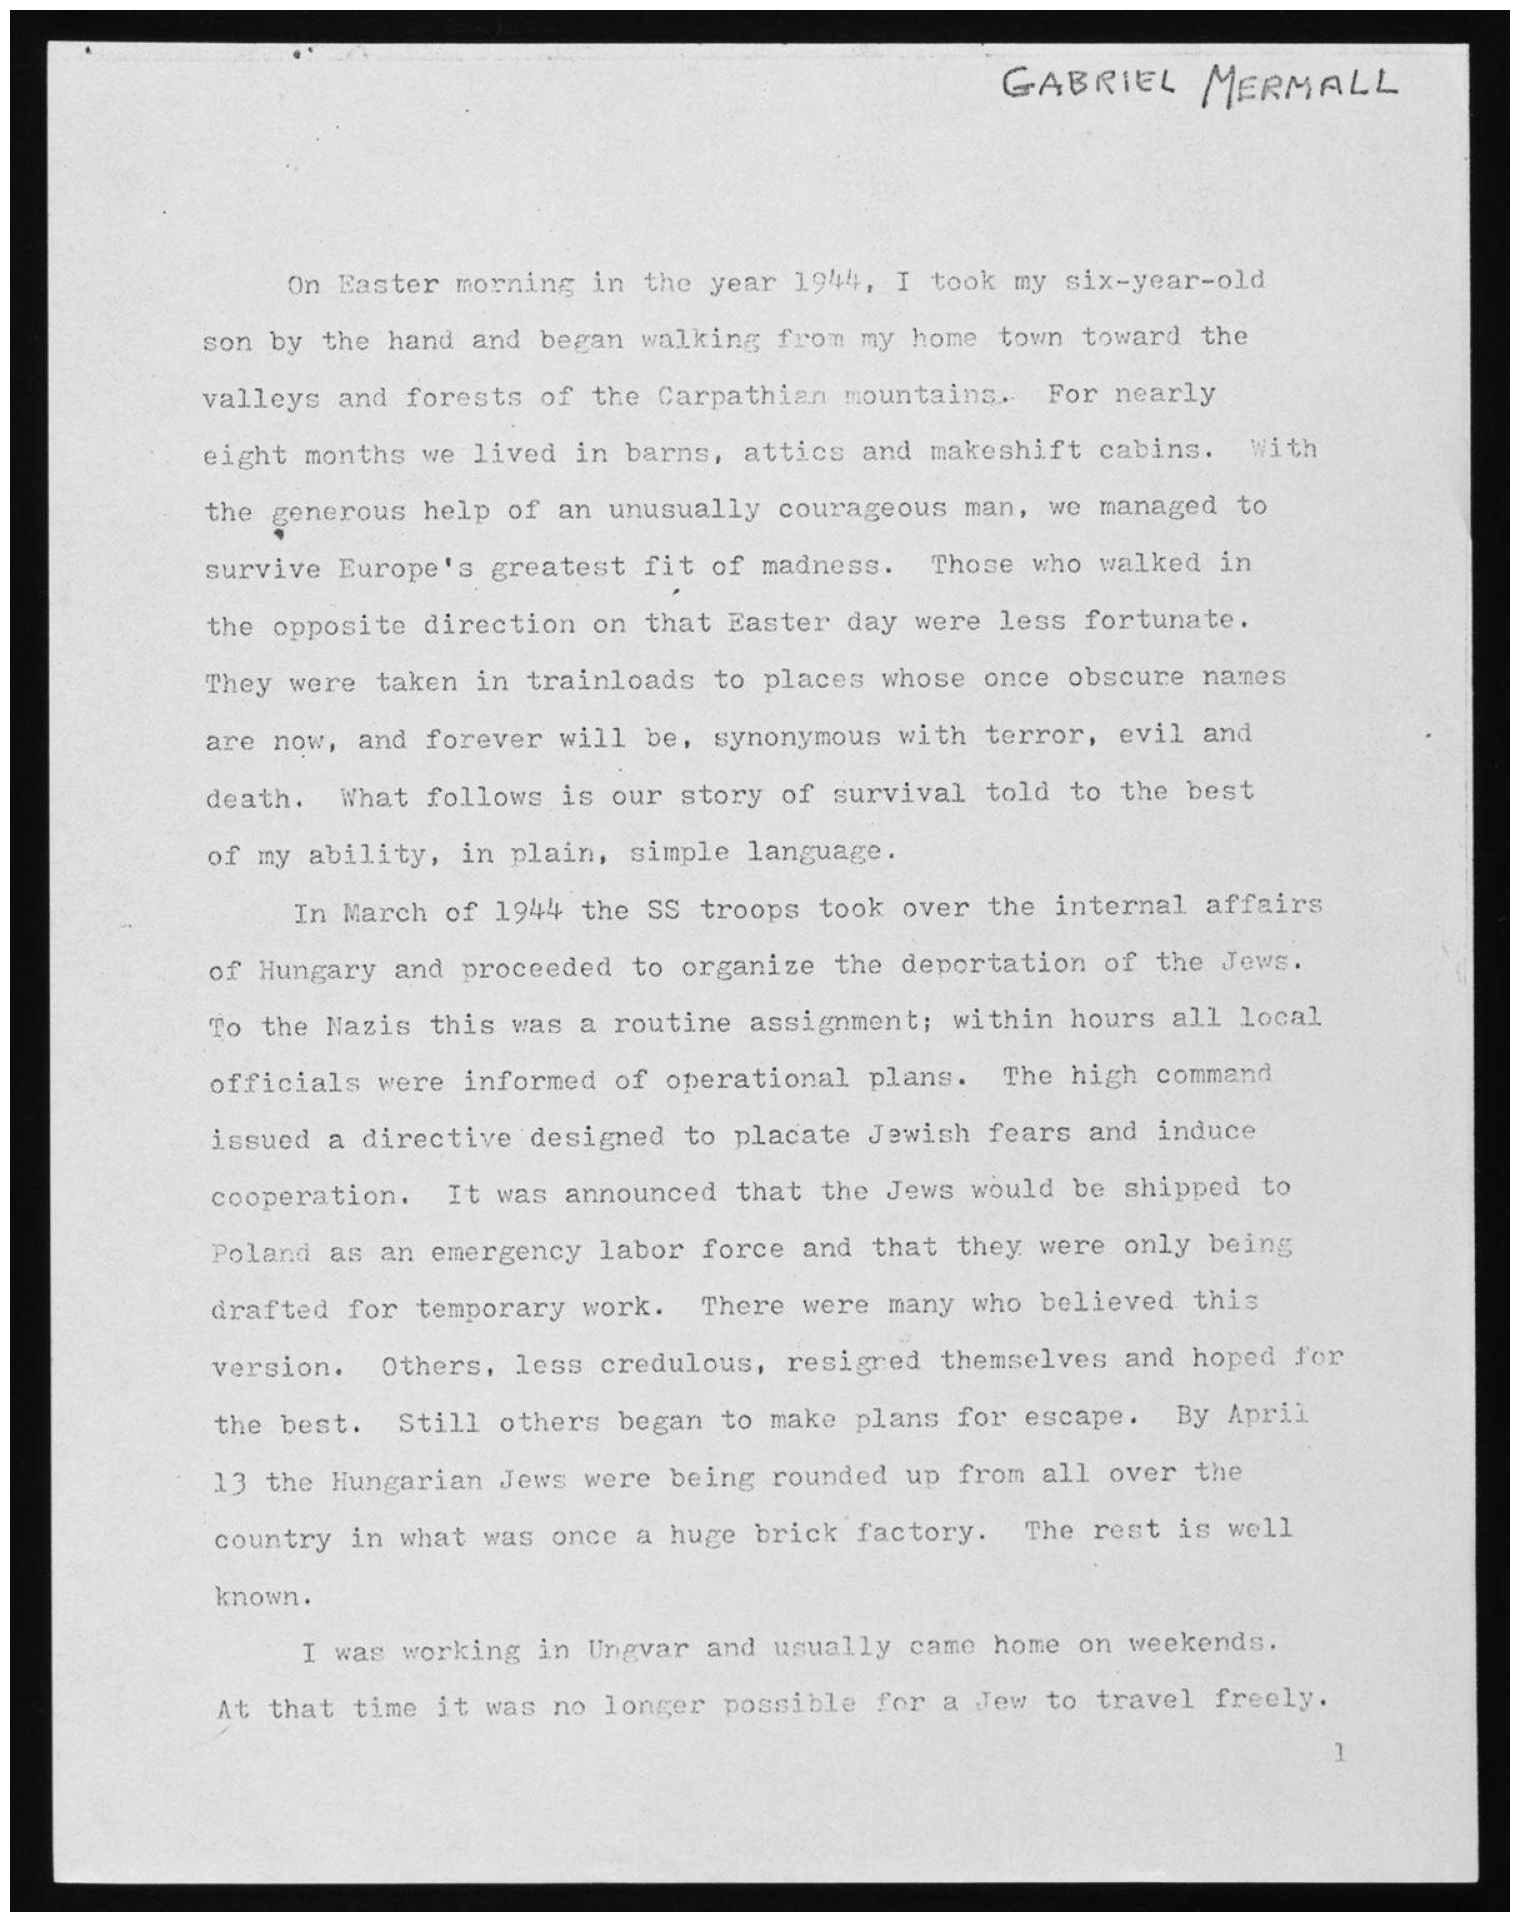

In [8]:
display("temp/gray.jpg")

In [9]:
def binarize_image(gray_image, th1=210, th2=230):
    thresh, im_bw = cv2.threshold(gray_image, th1, th2, cv2.THRESH_BINARY)
    return im_bw

In [10]:
binarized_image=binarize_image(gray_image)
cv2.imwrite("temp/binarized_image.jpg", binarized_image)

True

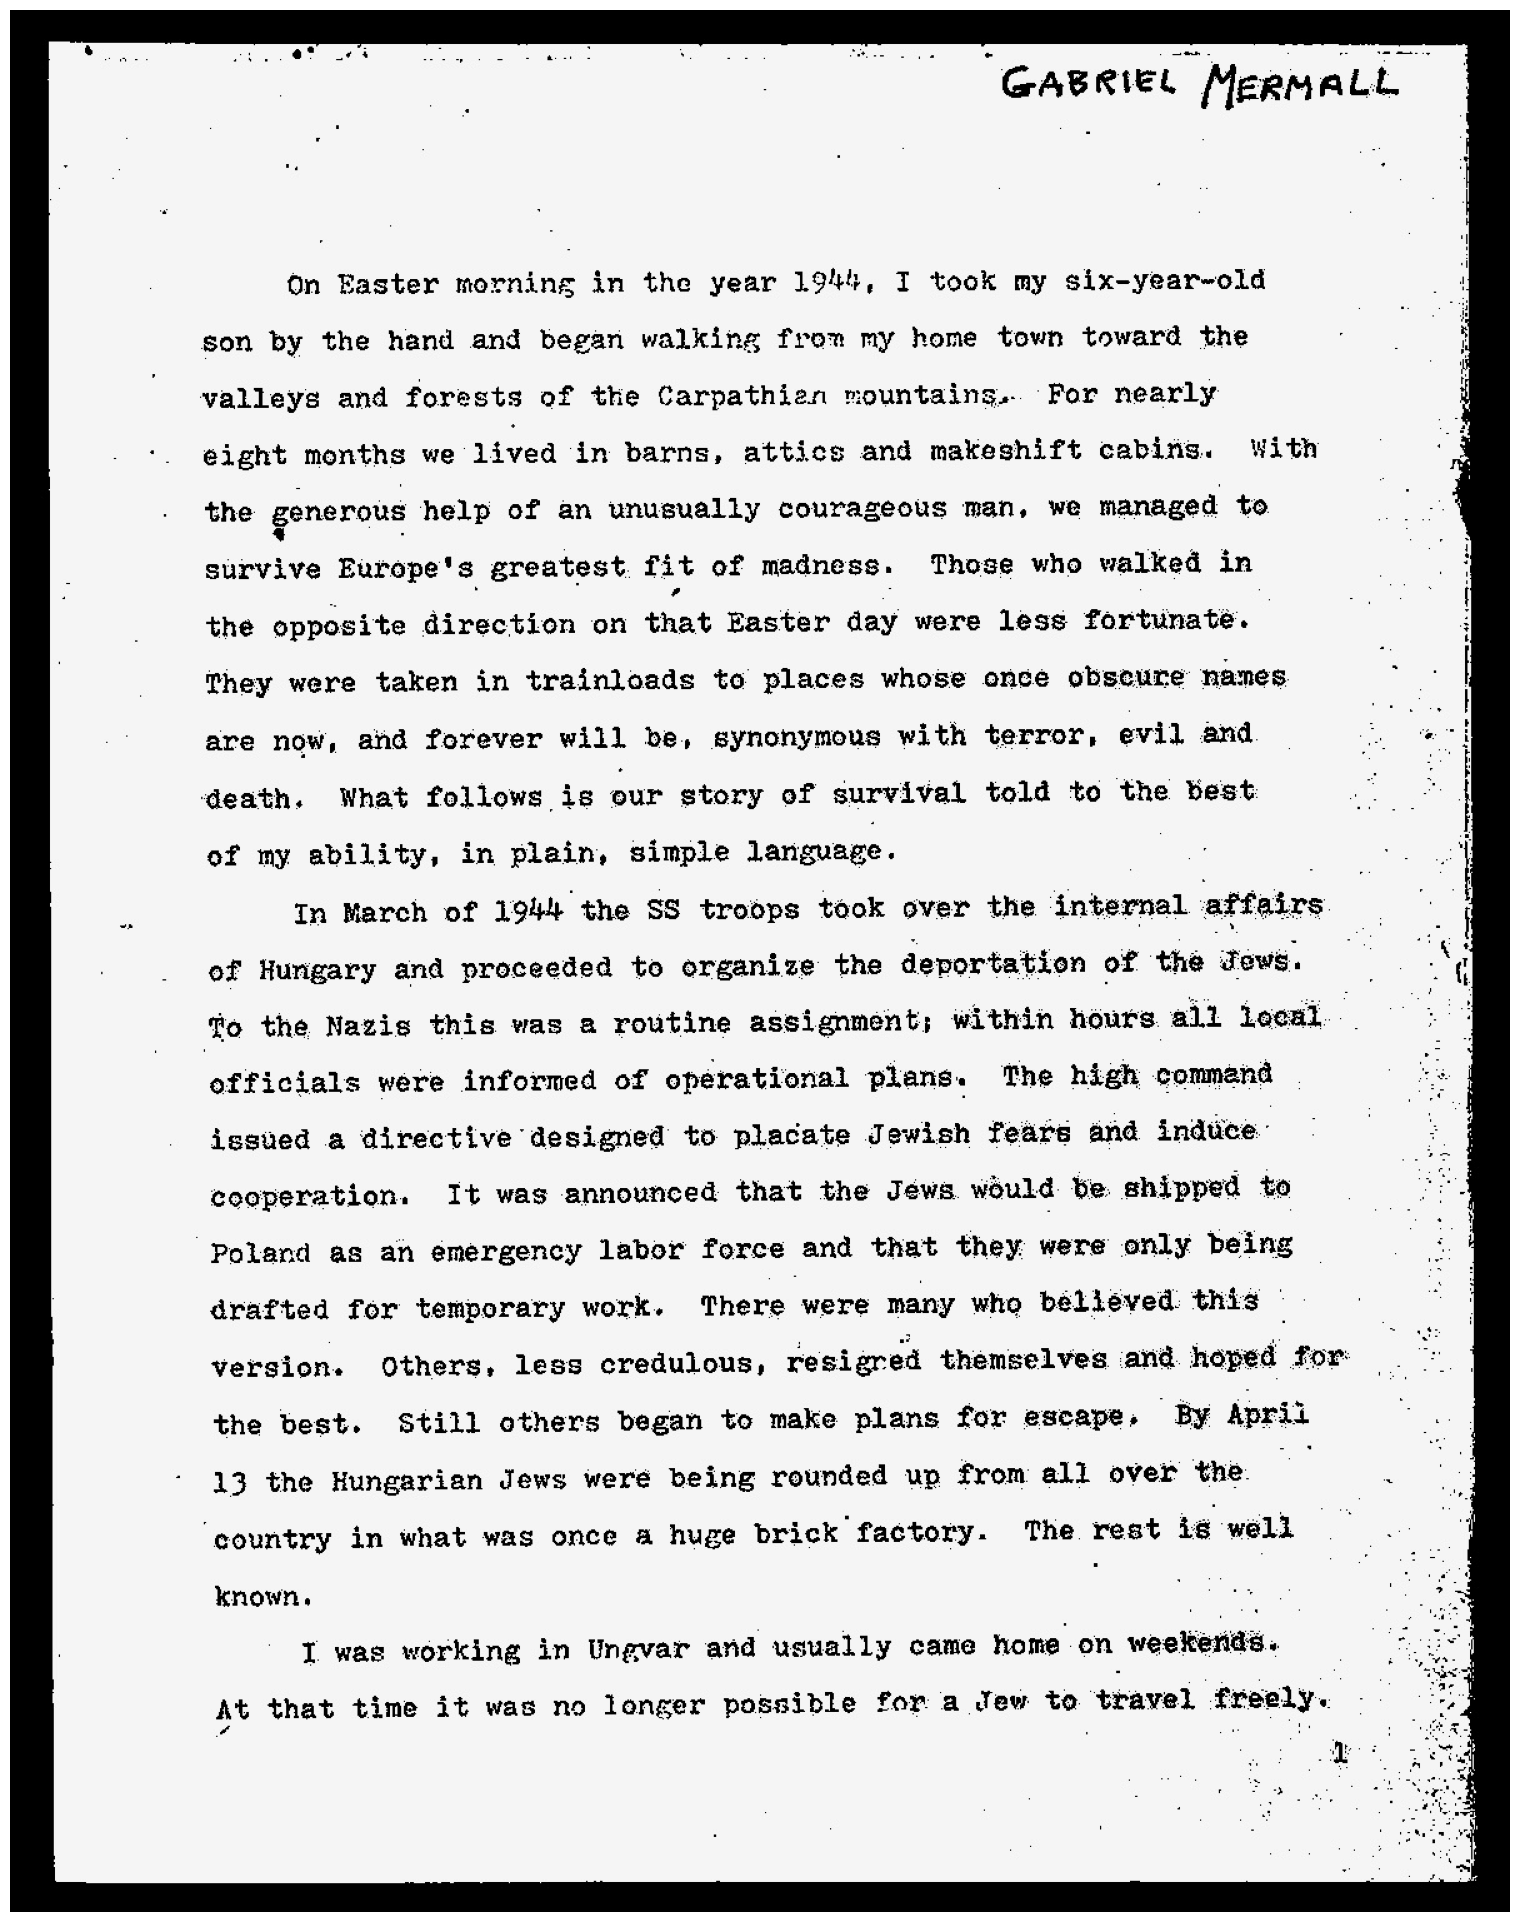

In [11]:
display("temp/binarized_image.jpg")

## Noise Removal

In [12]:
def nosie_remove(image):
    kernal = np.ones((1, 1), np.uint8)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return image


In [13]:
no_noise = nosie_remove(binarized_image)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

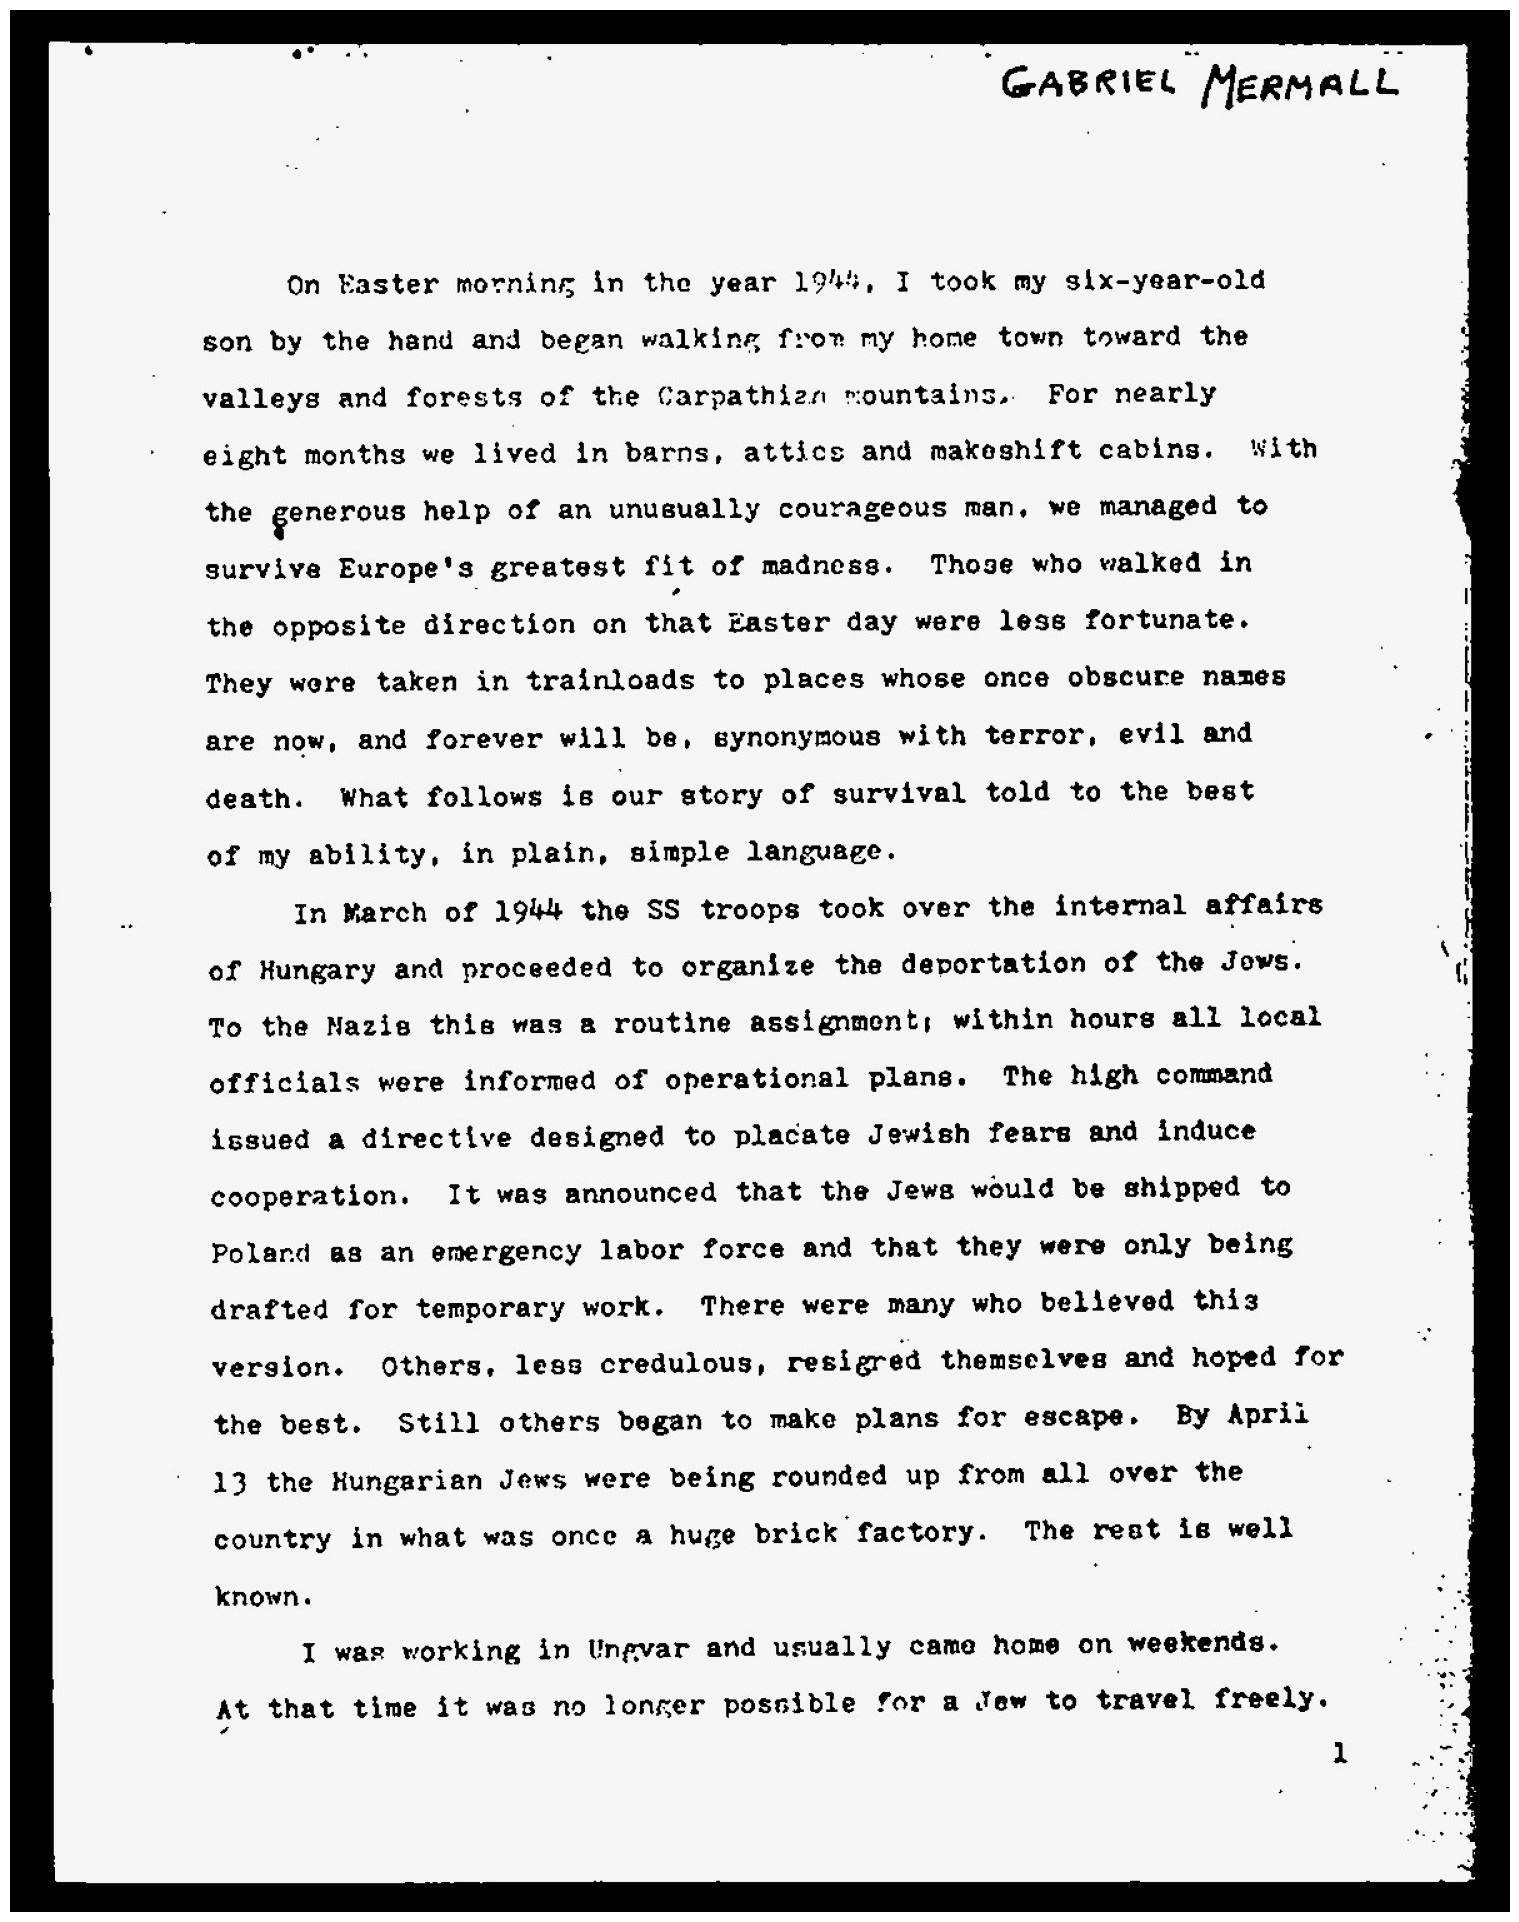

In [14]:
display("temp/no_noise.jpg")

## Dilation and Erosion

### Erosion

In [16]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [17]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

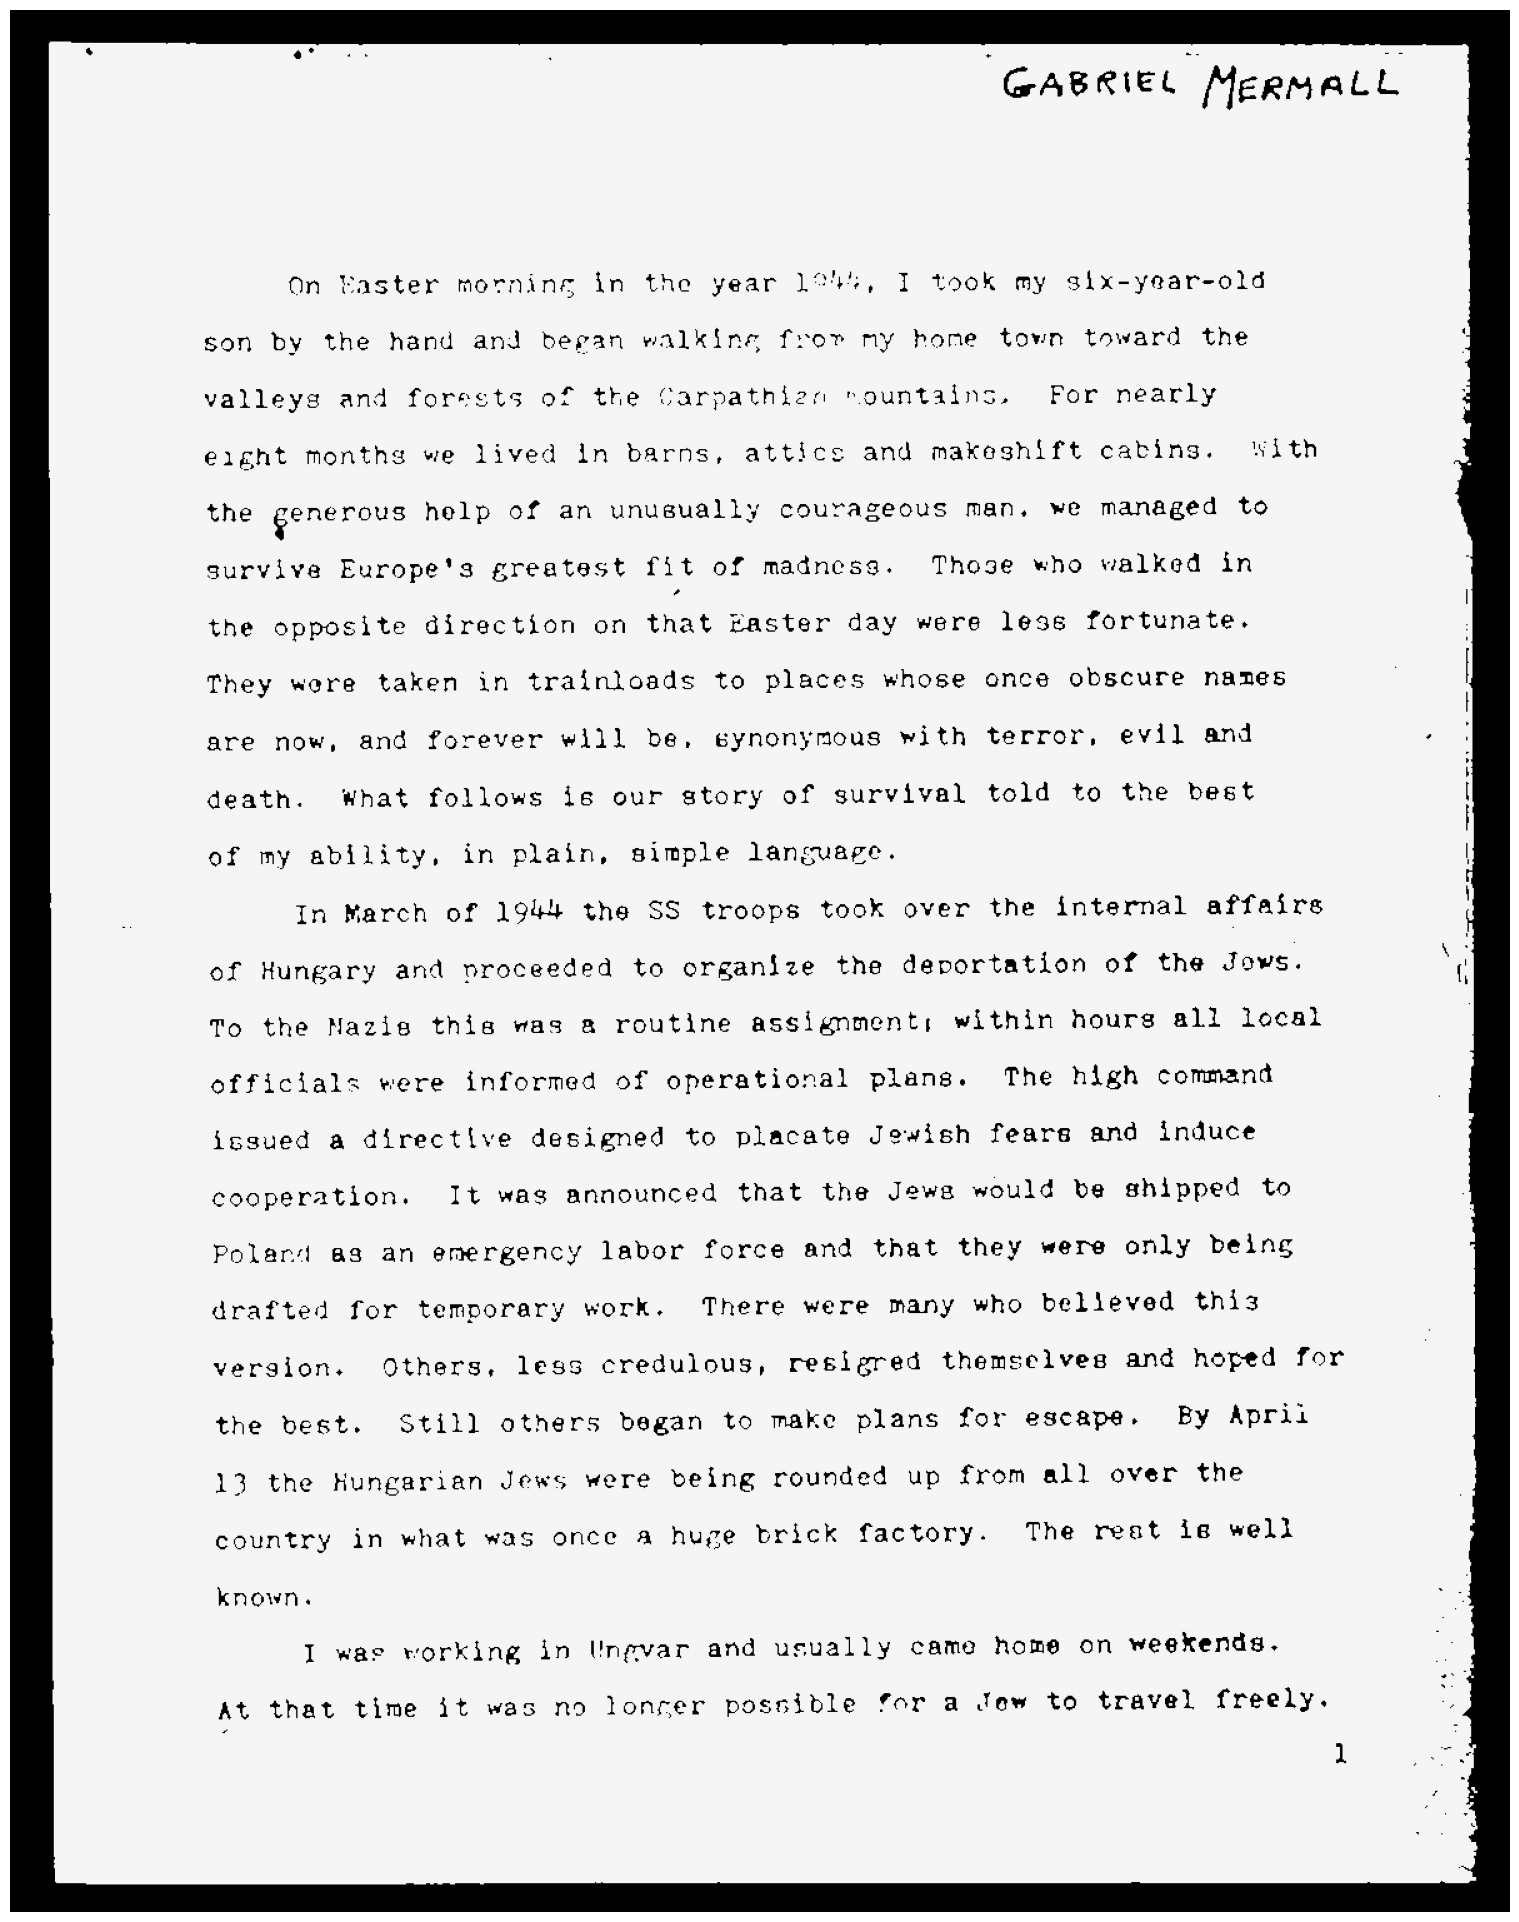

In [18]:
display("temp/eroded_image.jpg")